In [69]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [70]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150

In [71]:
graph = nx.complete_graph(100)

In [72]:
MC_STEPS = 1000
Q = 4
N = 100

In [73]:
def get_neighbors(graph):
    d = {}
    for node in list(graph.nodes()):
        d[node] = list(graph.neighbors(node))
    return d

In [74]:
def get_opinions(opinion1_prop, nodes_num):
    opinion1 = int(opinion1_prop*nodes_num)
    opinions = [-1]*(nodes_num - opinion1) + [1]*opinion1
    random.shuffle(opinions)
    opinions_dict = {i:opinions[i] for i in range(nodes_num)}
    return opinions_dict

In [75]:
def q_voter_model(graph, p, q, f, opinion1, MC_steps):
    opinions = get_opinions(opinion1, nx.number_of_nodes(graph))
    neighbors = get_neighbors(graph)
    nodes = list(neighbors.keys())
    n = len(nodes)
    concentration = np.zeros(MC_steps)
    for i in range(MC_steps):
        nodes = np.random.randint(0, n, size=n)
        ps = np.random.uniform(size=n) < p
        
        for j, node in enumerate(nodes):
            node_opinion = opinions[node]
            contrary = -1 if node_opinion == 1 else 1
            if ps[j]:
                opinions[node] = contrary if random.uniform(0, 1) < f else node_opinion
            else:
                curr_q = q
                if q > len(neighbors[node]):
                    curr_q = len(neighbors[node])
                neighbor_list = random.sample(neighbors[node], k=curr_q)
                neighbors_opinions = [opinions[i] for i in neighbor_list]
                if neighbors_opinions.count(node_opinion) == 0:
                    opinions[node] = contrary

    concentration = np.count_nonzero(np.array(list(opinions.values()))==opinion1)/n
    return concentration

In [95]:
ps = np.arange(0, 1, 0.01)

In [96]:
fs = [0.2, 0.3, 0.4, 0.5]

In [97]:
def simulate_q_voter_CG(p, q, epsilon, MC_steps=1000, steps=100, opinion1=1, N=100):
    graph = nx.complete_graph(N)
    results = np.zeros((steps, MC_steps))
    for i in range(steps):
        concentration = q_voter_model(graph, p, q, epsilon, opinion1, MC_steps)
        results[i] = concentration
    return np.mean(results, axis = 0)

## Concentration

In [98]:
def simulate_concentration(ps, f, Q, MC_steps=1000, steps=100, graph_size=100):
    final_concentration = np.zeros(len(ps))
    for i, p in enumerate(ps):
        final_concentration[i] = simulate_q_voter_CG(p, Q, f, MC_steps=MC_steps, steps=steps, opinion1=1, N=graph_size)[-1]
    return final_concentration

In [99]:
MC_STEPS = 1000
repetitions = 200
size=100

In [100]:
concentration = list(np.zeros(len(fs)))
for i, f in enumerate(fs):
    print(f)
    concentration[i] = simulate_concentration(ps, f, Q=4, MC_steps=MC_STEPS, steps=repetitions, graph_size=size)

0.2
0.3
0.4
0.5


In [83]:
concentration

[None, 0.0, 0.0, 0.0]

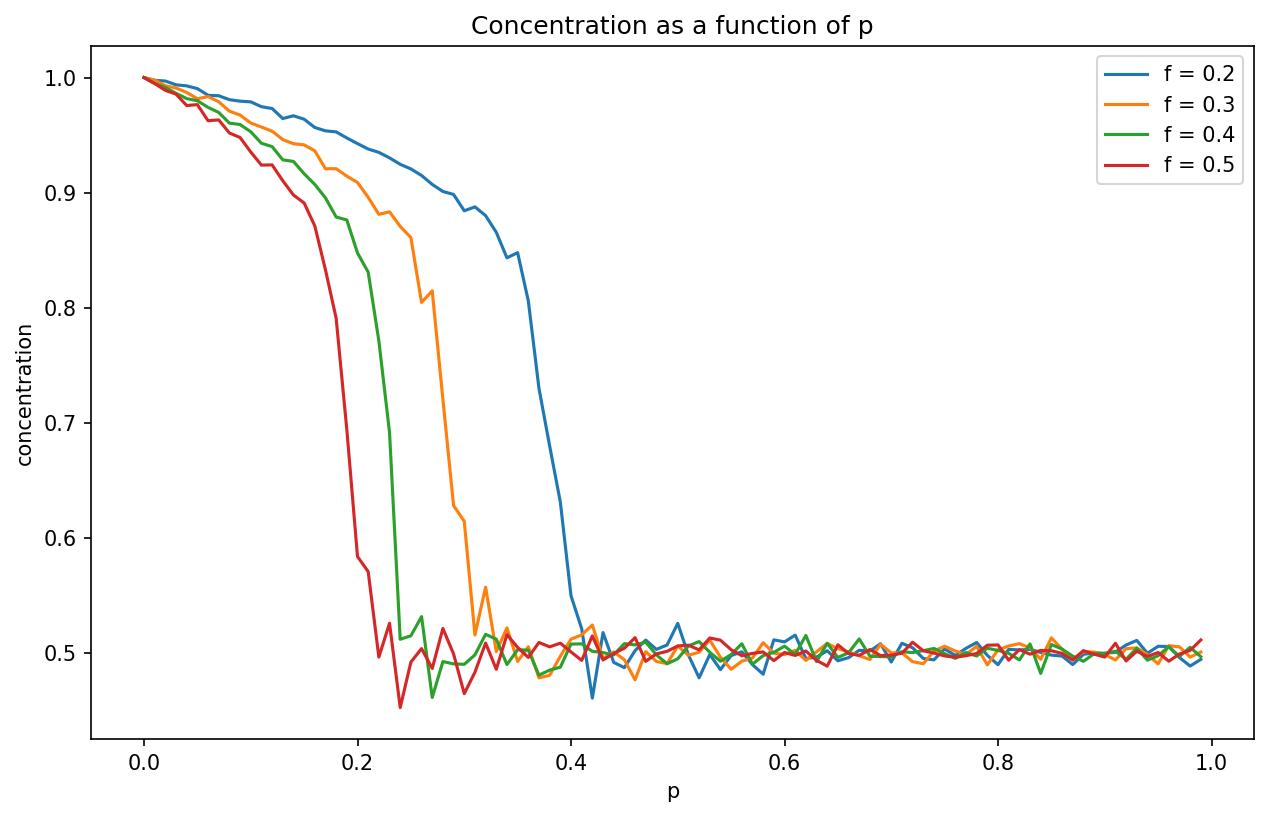

In [101]:
for i, f in enumerate(fs):
    plt.plot(ps, concentration[i], label=f'f = {f}')
plt.xlabel('p')
plt.ylabel('concentration')
plt.legend()
plt.title("Concentration as a function of p")
plt.savefig('concentration_200.png')

In [102]:
concentration

[array([1.    , 0.9976, 0.997 , 0.9937, 0.9928, 0.9904, 0.9846, 0.9842,
        0.9808, 0.9795, 0.9789, 0.9747, 0.9731, 0.9644, 0.9668, 0.9638,
        0.9566, 0.9537, 0.9528, 0.9475, 0.9426, 0.9379, 0.935 , 0.9302,
        0.9246, 0.9206, 0.9149, 0.9071, 0.901 , 0.8984, 0.8842, 0.8876,
        0.88  , 0.8655, 0.8433, 0.8478, 0.8059, 0.7298, 0.6797, 0.631 ,
        0.5495, 0.5209, 0.4605, 0.5175, 0.4916, 0.487 , 0.5018, 0.511 ,
        0.5029, 0.5067, 0.5255, 0.498 , 0.4782, 0.4984, 0.4853, 0.4975,
        0.5008, 0.4896, 0.4813, 0.5112, 0.5094, 0.5153, 0.4949, 0.4962,
        0.5017, 0.493 , 0.4957, 0.5021, 0.5015, 0.5078, 0.4919, 0.5082,
        0.5043, 0.495 , 0.4938, 0.5033, 0.4976, 0.5038, 0.5089, 0.4977,
        0.4896, 0.5029, 0.5024, 0.5029, 0.5003, 0.4979, 0.4971, 0.4897,
        0.4986, 0.4999, 0.4995, 0.5004, 0.5067, 0.5107, 0.4995, 0.5056,
        0.5054, 0.4958, 0.4884, 0.4942]),
 array([1.    , 0.9978, 0.9929, 0.9909, 0.9871, 0.9816, 0.9835, 0.979 ,
        0.9708, 0.9674

In [103]:
conc_arr = np.array(concentration) 

In [105]:
np.savetxt("concentration_200.txt", conc_arr)